In [490]:
import pandas as pd
import numpy as np
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [491]:
# Load datasets

train_df=pd.read_csv("C:/Users/Hiruni/Downloads/credit_score/train.csv")

C:\Users\Hiruni\AppData\Local\Temp\ipykernel_32656\3401988784.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv("C:/Users/Hiruni/Downloads/credit_score/train.csv")


In [492]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [493]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [494]:
# Get the count of unique values for each column in the train dataset
for column in train_df.columns:
    num_unique = train_df[column].nunique()
    print(f"Number of unique values for '{column}': {num_unique}")
    print('-' * 40)


Number of unique values for 'ID': 100000
----------------------------------------
Number of unique values for 'Customer_ID': 12500
----------------------------------------
Number of unique values for 'Month': 8
----------------------------------------
Number of unique values for 'Name': 10139
----------------------------------------
Number of unique values for 'Age': 1788
----------------------------------------
Number of unique values for 'SSN': 12501
----------------------------------------
Number of unique values for 'Occupation': 16
----------------------------------------
Number of unique values for 'Annual_Income': 18940
----------------------------------------
Number of unique values for 'Monthly_Inhand_Salary': 13235
----------------------------------------
Number of unique values for 'Num_Bank_Accounts': 943
----------------------------------------
Number of unique values for 'Num_Credit_Card': 1179
----------------------------------------
Number of unique values for 'Interest

In [495]:
# List of columns to drop - ONLY IDENTIFIERS
columns_to_remove = [
    'ID',  
    'SSN', 
    'Name',
    'Credit_History_Age']

# Removing columns from both train and test datasets
train_df = train_df.drop(columns=columns_to_remove, axis=1)

# Optionally, print the first few rows to confirm the columns were dropped
print(train_df.head())

  Customer_ID     Month   Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0   CUS_0xd40   January    23  Scientist      19114.12            1824.843333   
1   CUS_0xd40  February    23  Scientist      19114.12                    NaN   
2   CUS_0xd40     March  -500  Scientist      19114.12                    NaN   
3   CUS_0xd40     April    23  Scientist      19114.12                    NaN   
4   CUS_0xd40       May    23  Scientist      19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  ...  \
0                  3                4              3           4  ...   
1                  3                4              3           4  ...   
2                  3                4              3           4  ...   
3                  3                4              3           4  ...   
4                  3                4              3           4  ...   

  Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Rat

In [496]:
# Handle inconsistencies in values for the same individual

In [497]:
# Age

In [498]:
import numpy as np
import pandas as pd

# Step 0: Convert Age to numeric, coerce invalid entries to NaN
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

# Step 1: Replace negative Age values with NaN (treat as invalid)
train_df['Age'] = train_df['Age'].apply(lambda x: np.nan if pd.notna(x) and x < 0 else x)

# Step 2: Calculate mode Age per Customer_ID group (ignore NaNs)
age_mode = train_df.groupby('Customer_ID')['Age'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 3: Merge mode values back into dataframe
train_df = train_df.merge(age_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Step 4: Replace Age with group mode
train_df['Age'] = train_df['Age_mode']
train_df.drop(columns=['Age_mode'], inplace=True)

# Step 5: Check if each Customer_ID has only one unique age
unique_age_count = train_df.groupby('Customer_ID')['Age'].nunique()
result = (unique_age_count == 1).all()
print("Yes" if result else "No")

# Step 6: Check remaining missing values
print("Missing Age values after imputation:", train_df['Age'].isna().sum())


Yes
Missing Age values after imputation: 0


In [499]:
# Occupation

In [500]:
# Step 1: Replace '_______' with NaN to handle them like missing values
train_df['Occupation'] = train_df['Occupation'].replace('_______', pd.NA)

# Step 2: Compute the mode of Occupation for each Customer_ID (ignoring NaNs)
Occupation_mode = train_df.groupby('Customer_ID')['Occupation'].apply(lambda x: x.mode(dropna=True)[0] if not x.mode(dropna=True).empty else pd.NA)

# Step 3: Merge the mode values back to the original dataframe
train_df = train_df.merge(Occupation_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Step 4: Replace Occupation column with mode (for both NaNs and valid rows)
train_df['Occupation'] = train_df['Occupation_mode']

# Step 5: Drop the extra column
train_df.drop(columns=['Occupation_mode'], inplace=True)

# Step 6: Final check — count missing Occupation values
print("Missing Occupation entries:", train_df["Occupation"].isna().sum())


Missing Occupation entries: 0


In [501]:
# Annual_Income

In [502]:
# Step 1: Clean 'Annual_Income' column by removing underscores and special characters
train_df['Annual_Income'] = train_df['Annual_Income'].apply(lambda x: str(x).replace('_', '') if isinstance(x, str) else x)

# Convert the 'Annual_Income' column to numeric, coercing errors to NaN
train_df['Annual_Income'] = pd.to_numeric(train_df['Annual_Income'], errors='coerce')

column_name = 'Annual_Income'

# Step 1: Replace negative values or values greater than 1,000,000 with NaN
train_df[column_name] = train_df[column_name].apply(lambda x: x if (x >= 0 and x <= 1000000) else np.nan)

# Step 2: Group by 'Customer_ID' and calculate the mean of the column within each group
group_mean = train_df.groupby('Customer_ID')[column_name].transform('mean')

# Step 3: Impute the NaN values with the calculated group mean
train_df[column_name] = train_df[column_name].fillna(group_mean)

# Check the result
print(train_df[[column_name, 'Customer_ID']].head(20))



    Annual_Income Customer_ID
0        19114.12   CUS_0xd40
1        19114.12   CUS_0xd40
2        19114.12   CUS_0xd40
3        19114.12   CUS_0xd40
4        19114.12   CUS_0xd40
5        19114.12   CUS_0xd40
6        19114.12   CUS_0xd40
7        19114.12   CUS_0xd40
8        34847.84  CUS_0x21b1
9        34847.84  CUS_0x21b1
10       34847.84  CUS_0x21b1
11       34847.84  CUS_0x21b1
12       34847.84  CUS_0x21b1
13       34847.84  CUS_0x21b1
14       34847.84  CUS_0x21b1
15       34847.84  CUS_0x21b1
16      143162.64  CUS_0x2dbc
17      143162.64  CUS_0x2dbc
18      143162.64  CUS_0x2dbc
19      143162.64  CUS_0x2dbc


In [503]:
# Monthly balance

In [504]:
# Group by Customer_ID and calculate the mode of Monthly_Inhand_Salary for each group
Monthly_Inhand_Salary_mode = train_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.mode()[0])

# Merge the mode values back into the original dataframe
train_df = train_df.merge(Monthly_Inhand_Salary_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Replace the Monthly_Inhand_Salary column with the mode value for each group
train_df['Monthly_Inhand_Salary'] = train_df['Monthly_Inhand_Salary_mode']

# Drop the extra 'Monthly_Inhand_Salary_mode' column
train_df.drop(columns=['Monthly_Inhand_Salary_mode'], inplace=True)

# Get the number of unique values of 'Monthly_Inhand_Salary' for each 'Customer_ID'
unique_Monthly_Inhand_Salary_count = train_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].nunique()

# Check if all groups have exactly 1 unique value
result = (unique_Monthly_Inhand_Salary_count == 1).all()

# Print result (True means all groups have exactly 1 unique Monthly_Inhand_Salary, False means some groups have multiple Monthly_Inhand_Salaries)
print("Yes" if result else "No")

train_df["Monthly_Inhand_Salary"].isna().sum()

Yes


0

In [505]:
# Number of bank accounts

In [506]:
import numpy as np

# Step 1: Replace negative values in Num_Bank_Accounts with NaN
train_df['Num_Bank_Accounts'] = train_df['Num_Bank_Accounts'].apply(lambda x: np.nan if x < 0 else x)

# Step 2: Calculate mode of Num_Bank_Accounts per Customer_ID group (ignoring NaNs)
Num_Bank_Accounts_mode = train_df.groupby('Customer_ID')['Num_Bank_Accounts'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)

# Step 3: Merge mode values back into dataframe
train_df = train_df.merge(Num_Bank_Accounts_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Step 4: Replace original column with mode values (impute missing/invalid)
train_df['Num_Bank_Accounts'] = train_df['Num_Bank_Accounts_mode']

# Step 5: Drop helper mode column
train_df.drop(columns=['Num_Bank_Accounts_mode'], inplace=True)

# Step 6: Check if each Customer_ID group has exactly 1 unique Num_Bank_Accounts value
unique_Num_Bank_Accounts_count = train_df.groupby('Customer_ID')['Num_Bank_Accounts'].nunique()
result = (unique_Num_Bank_Accounts_count == 1).all()
print("Yes" if result else "No")

# Step 7: Check for remaining missing values after imputation
print("Missing Num_Bank_Accounts values:", train_df['Num_Bank_Accounts'].isna().sum())


Yes
Missing Num_Bank_Accounts values: 0


In [507]:
# Number of credit cards

In [508]:
# Group by Customer_ID and calculate the mode of Num_Credit_Card for each group
Num_Credit_Card_mode = train_df.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.mode()[0])

# Merge the mode values back into the original dataframe
train_df = train_df.merge(Num_Credit_Card_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Replace the Num_Credit_Card column with the mode value for each group
train_df['Num_Credit_Card'] = train_df['Num_Credit_Card_mode']

# Drop the extra 'Num_Credit_Card_mode' column
train_df.drop(columns=['Num_Credit_Card_mode'], inplace=True)

# Get the number of unique values of 'Num_Credit_Card' for each 'Customer_ID'
unique_Num_Credit_Card_count = train_df.groupby('Customer_ID')['Num_Credit_Card'].nunique()

# Check if all groups have exactly 1 unique value
result = (unique_Num_Credit_Card_count == 1).all()

# Print result (True means all groups have exactly 1 unique Num_Credit_Card, False means some groups have multiple Num_Credit_Card)
print("Yes" if result else "No")

train_df["Num_Credit_Card"].isna().sum()

Yes


0

In [509]:
# Interest rate

In [510]:
# Group by Customer_ID and calculate the mode of Interest_Rate for each group
Interest_Rate_mode = train_df.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.mode()[0])

# Merge the mode values back into the original dataframe
train_df = train_df.merge(Interest_Rate_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Replace the Interest_Rate column with the mode value for each group
train_df['Interest_Rate'] = train_df['Interest_Rate_mode']

# Drop the extra 'Interest_Rate_mode' column
train_df.drop(columns=['Interest_Rate_mode'], inplace=True)

# Get the number of unique values of 'Interest_Rate' for each 'Customer_ID'
unique_Interest_Rate_count = train_df.groupby('Customer_ID')['Interest_Rate'].nunique()

# Check if all groups have exactly 1 unique Interest_Rate
result = (unique_Interest_Rate_count == 1).all()

# Print result (True means all groups have exactly 1 unique Interest_Rate, False means some groups have multiple Interest_Rate)
print("Yes" if result else "No")

train_df["Interest_Rate"].isna().sum()

Yes


0

In [511]:
# Number of Loan

In [512]:
# Group by Customer_ID and calculate the mode of Num_of_Loan for each group
Num_of_Loan_mode = train_df.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.mode()[0])

# Merge the mode values back into the original dataframe
train_df = train_df.merge(Num_of_Loan_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Replace the Num_of_Loan column with the mode value for each group
train_df['Num_of_Loan'] = train_df['Num_of_Loan_mode']

# Drop the extra 'Num_of_Loan_mode' column
train_df.drop(columns=['Num_of_Loan_mode'], inplace=True)

# Get the number of unique values of 'Num_of_Loan' for each 'Customer_ID'
unique_Num_of_Loan_count = train_df.groupby('Customer_ID')['Num_of_Loan'].nunique()

# Check if all groups have exactly 1 unique Num_of_Loan
result = (unique_Num_of_Loan_count == 1).all()

# Print result (True means all groups have exactly 1 unique Num_of_Loan, False means some groups have multiple Num_of_Loan)
print("Yes" if result else "No")

train_df["Num_of_Loan"].isna().sum()

Yes


0

In [513]:
# Credit mix

In [514]:
# Group by Customer_ID and calculate the mode of Credit_Mix for each group
Credit_Mix_mode = train_df.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.mode()[0])

# Merge the mode values back into the original dataframe
train_df = train_df.merge(Credit_Mix_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Replace the Credit_Mix column with the mode value for each group
train_df['Credit_Mix'] = train_df['Credit_Mix_mode']

# Drop the extra 'Credit_Mix_mode' column
train_df.drop(columns=['Credit_Mix_mode'], inplace=True)

# Ensure that all values in 'Credit_Mix' are either 'good', 'bad', or 'standard'
valid_credit_mixes = ['Good', 'Bad', 'Standard']
train_df['Credit_Mix'] = train_df['Credit_Mix'].apply(lambda x: x if x in valid_credit_mixes else 'Standard')

# Get the number of unique values of 'Credit_Mix' for each 'Customer_ID'
unique_Credit_Mix_count = train_df.groupby('Customer_ID')['Credit_Mix'].nunique()

# Check if all groups have exactly 1 unique Credit_Mix
result = (unique_Credit_Mix_count == 1).all()

# Print result (True means all groups have exactly 1 unique Credit_Mix, False means some groups have multiple Credit_Mix)
print("Yes" if result else "No")

# Check if there are any NaN values in the 'Credit_Mix' column
missing_values_count = train_df["Credit_Mix"].isna().sum()
print(f"Missing values in 'Credit_Mix': {missing_values_count}")


Yes
Missing values in 'Credit_Mix': 0


In [515]:
# Outstanding Debt

In [516]:
# Group by Customer_ID and calculate the mode of Outstanding_Debt for each group
Outstanding_Debt_mode = train_df.groupby('Customer_ID')['Outstanding_Debt'].apply(lambda x: x.mode()[0])

# Merge the mode values back into the original dataframe
train_df = train_df.merge(Outstanding_Debt_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Replace the Outstanding_Debt column with the mode value for each group
train_df['Outstanding_Debt'] = train_df['Outstanding_Debt_mode']

# Drop the extra 'Outstanding_Debt_mode' column
train_df.drop(columns=['Outstanding_Debt_mode'], inplace=True)

# Get the number of unique values of 'Outstanding_Debt' for each 'Customer_ID'
unique_Outstanding_Debt_count = train_df.groupby('Customer_ID')['Outstanding_Debt'].nunique()

# Check if all groups have exactly 1 unique COutstanding_Debt
result = (unique_Outstanding_Debt_count == 1).all()

# Print result (True means all groups have exactly 1 unique Outstanding_Debt, False means some groups have multiple Outstanding_Debt)
print("Yes" if result else "No")

train_df["Outstanding_Debt"].isna().sum()

Yes


0

In [517]:
# Payment of min amount

In [518]:
# Group by Customer_ID and calculate the mode of Payment_of_Min_Amount for each group
Payment_of_Min_Amount_mode = train_df.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(
    lambda x: x.mode()[0] if x.mode()[0] != 'NM' else 'NO'
)

# Merge the mode values back into the original dataframe
train_df = train_df.merge(Payment_of_Min_Amount_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Replace the Payment_of_Min_Amount column with the mode value for each group
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount_mode']

# Drop the extra 'Payment_of_Min_Amount_mode' column
train_df.drop(columns=['Payment_of_Min_Amount_mode'], inplace=True)

# Ensure all values in 'Payment_of_Min_Amount' are either 'Yes' or 'No'
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')

# Get the number of unique values of 'Payment_of_Min_Amount' for each 'Customer_ID'
unique_Payment_of_Min_Amount_count = train_df.groupby('Customer_ID')['Payment_of_Min_Amount'].nunique()

# Check if all groups have exactly 1 unique Payment_of_Min_Amount
result = (unique_Payment_of_Min_Amount_count == 1).all()

# Print result (True means all groups have exactly 1 unique Payment_of_Min_Amount, False means some groups have multiple Payment_of_Min_Amount)
print("Yes" if result else "No")

# Check if there are any NaN values in the 'Payment_of_Min_Amount' column
missing_values_count = train_df["Payment_of_Min_Amount"].isna().sum()
print(f"Missing values in 'Payment_of_Min_Amount': {missing_values_count}")



Yes
Missing values in 'Payment_of_Min_Amount': 0


In [519]:
# Total EMI

In [520]:
# Group by Customer_ID and calculate the mode of Total_EMI_per_month for each group
Total_EMI_per_month_mode = train_df.groupby('Customer_ID')['Total_EMI_per_month'].apply(lambda x: x.mode()[0])

# Merge the mode values back into the original dataframe
train_df = train_df.merge(Total_EMI_per_month_mode, on='Customer_ID', how='left', suffixes=('', '_mode'))

# Replace the Total_EMI_per_month column with the mode value for each group
train_df['Total_EMI_per_month'] = train_df['Total_EMI_per_month_mode']

# Drop the extra 'Total_EMI_per_month_mode' column
train_df.drop(columns=['Total_EMI_per_month_mode'], inplace=True)

# Get the number of unique values of 'Total_EMI_per_month' for each 'Customer_ID'
unique_Total_EMI_per_month_count = train_df.groupby('Customer_ID')['Total_EMI_per_month'].nunique()

# Check if all groups have exactly 1 unique Total_EMI_per_month
result = (unique_Total_EMI_per_month_count == 1).all()

# Print result (True means all groups have exactly 1 unique Total_EMI_per_month, False means some groups have multiple Total_EMI_per_month)
print("Yes" if result else "No")

train_df["Total_EMI_per_month"].isna().sum()

Yes


0

In [521]:
# Check if individuals have the same values

In [522]:
train_df.head(20)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,...,4.0,Good,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,CUS_0xd40,June,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,CUS_0xd40,July,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,...,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,CUS_0xd40,August,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4,...,4.0,Good,809.98,23.933795,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,CUS_0x21b1,January,28.0,Teacher,34847.84,3037.986667,2.0,4,6,1,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,CUS_0x21b1,February,28.0,Teacher,34847.84,3037.986667,2.0,4,6,1,...,2.0,Good,605.03,38.550848,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [523]:
# Split into train, test 80%-20% 

In [524]:
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42,stratify=train_df['Credit_Score'])

print(f"Train set size: {train_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")

Train set size: 80000
Test set size: 20000


In [525]:
# Delay from due date

In [526]:
column_name = 'Delay_from_due_date'

# Step 1: Replace negative values or values greater than 100 with NaN
train_df[column_name] = train_df[column_name].apply(lambda x: x if (x >= 0 and x <= 100) else np.nan)

# Step 2: Group by 'Customer_ID' and calculate the mean of the column within each group
group_mean = train_df.groupby('Customer_ID')[column_name].transform('mean')

# Round the group mean values to the nearest integer
group_mean_1 = group_mean.round().astype(int)

# Step 3: Impute the NaN values with the calculated group mean
train_df[column_name] = train_df[column_name].fillna(group_mean_1)

# Check the result
print(train_df[[column_name, 'Customer_ID']].head(20))

# Save parameters (e.g., group_mean) for later use in the test set
preprocessing_params = {
    'group_mean': group_mean_1
}

# Save the parameters as a pickle file for later use
joblib.dump(preprocessing_params, 'preprocessing_params_delay.pkl')

# Check the number of NaN values left in the train set
print(f"NaN values after preprocessing: \n{train_df.isna().sum()}")

       Delay_from_due_date Customer_ID
10268                  8.0  CUS_0x2dbf
12727                 13.0  CUS_0x8167
30953                  8.0  CUS_0x3a0b
61394                 15.0  CUS_0x9a4b
90061                 28.0  CUS_0x253a
25858                 27.0  CUS_0x318e
81010                 46.0  CUS_0xc6cc
16546                 13.0  CUS_0xc18f
2855                  25.0  CUS_0x797d
38341                 16.0  CUS_0x2abb
45750                  5.0  CUS_0x4c96
55289                 24.0  CUS_0x1b9c
34639                  1.0  CUS_0x424c
71283                 23.0  CUS_0xb741
72087                 60.0  CUS_0xae75
34062                  6.0  CUS_0x1f74
17602                 40.0  CUS_0x4a3b
30841                 28.0  CUS_0xb3ab
23459                 58.0  CUS_0x1ee3
75525                 62.0  CUS_0x79cb
NaN values after preprocessing: 
Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income   

In [527]:
# Remove underscores from columns

In [528]:
# Function to remove underscores and convert to a number (int/float)
def remove_underscores_and_convert(value):
    # Remove underscores from the value (anywhere) and convert to numeric
    if isinstance(value, str):  # Check if the value is a string
        value = value.replace('_', '')  # Remove all underscores
    return pd.to_numeric(value, errors='coerce')  # Convert to numeric, invalid parsing will become NaN

# Apply remove_underscores_and_convert to all columns except categorical

# List or set of columns you want to exclude
exclude_columns = {'Customer_ID', 'Month', 'Occupation','Type_of_Loan',
                  'Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score'}

# Apply the function to all columns except the ones in exclude_columns
train_df.loc[:, ~train_df.columns.isin(exclude_columns)] = train_df.loc[:, ~train_df.columns.isin(exclude_columns)].map(remove_underscores_and_convert)


In [529]:
# Number of delayed payments

In [530]:
column_name = 'Num_of_Delayed_Payment'

# Step 1: Replace negative values or values greater than 100 with NaN
train_df[column_name] = train_df[column_name].apply(lambda x: x if (x >= 0 and x <= 100) else np.nan)

# Step 2: Group by 'Customer_ID' and calculate the mean of the column within each group
group_mean = train_df.groupby('Customer_ID')[column_name].transform('mean')

# Round the group mean values to the nearest integer
group_mean_1 = group_mean.round()

# Step 3: Impute the NaN values with the calculated group mean
train_df[column_name] = train_df[column_name].fillna(group_mean_1)

# Check the result
print(train_df[[column_name, 'Customer_ID']].head(20))

# Save parameters (e.g., group_mean_1) for later use in the test set
preprocessing_params = {
    'group_mean_1': group_mean_1
}

# Save the parameters as a pickle file for later use
joblib.dump(preprocessing_params, 'preprocessing_params_num_delayed_payment.pkl')

# Check the number of NaN values left in the train set
print(f"NaN values after preprocessing: \n{train_df.isna().sum()}")

       Num_of_Delayed_Payment Customer_ID
10268                     8.0  CUS_0x2dbf
12727                     9.0  CUS_0x8167
30953                     2.0  CUS_0x3a0b
61394                    12.0  CUS_0x9a4b
90061                    16.0  CUS_0x253a
25858                     9.0  CUS_0x318e
81010                     8.0  CUS_0xc6cc
16546                     9.0  CUS_0xc18f
2855                     16.0  CUS_0x797d
38341                    15.0  CUS_0x2abb
45750                    11.0  CUS_0x4c96
55289                    15.0  CUS_0x1b9c
34639                    10.0  CUS_0x424c
71283                    15.0  CUS_0xb741
72087                    22.0  CUS_0xae75
34062                    14.0  CUS_0x1f74
17602                    19.0  CUS_0x4a3b
30841                    12.0  CUS_0xb3ab
23459                    23.0  CUS_0x1ee3
75525                     9.0  CUS_0x79cb
NaN values after preprocessing: 
Customer_ID                    0
Month                          0
Age                

In [531]:
# Changed credit limit

In [532]:
column_name = 'Changed_Credit_Limit'

# Step 1: Replace negative values or values greater than 100 with NaN in the train set
train_df[column_name] = train_df[column_name].apply(lambda x: x if (x >= 0 and x <= 100) else np.nan)

# Step 2: Group by 'Customer_ID' and calculate the mean of the column within each group
group_mean = train_df.groupby('Customer_ID')[column_name].transform('mean')

# Step 3: Impute the NaN values with the calculated group mean
train_df[column_name] = train_df[column_name].fillna(group_mean)

# Check the result
print(train_df[[column_name, 'Customer_ID']].head(20))

# Save the parameters (e.g., group_mean) for later use in the test set
preprocessing_params = {
    'group_mean': group_mean
}

# Save the parameters as a pickle file for later use
joblib.dump(preprocessing_params, 'preprocessing_params_changed_credit_limit.pkl')

# Check the number of NaN values left in the train set
print(f"NaN values after preprocessing: \n{train_df.isna().sum()}")

       Changed_Credit_Limit Customer_ID
10268                  2.89  CUS_0x2dbf
12727                 10.26  CUS_0x8167
30953                  1.17  CUS_0x3a0b
61394                  6.83  CUS_0x9a4b
90061                 15.45  CUS_0x253a
25858                  8.64  CUS_0x318e
81010                 18.43  CUS_0xc6cc
16546                  1.52  CUS_0xc18f
2855                  16.41  CUS_0x797d
38341                 29.80  CUS_0x2abb
45750                  9.11  CUS_0x4c96
55289                  7.40  CUS_0x1b9c
34639                  5.61  CUS_0x424c
71283                 19.24  CUS_0xb741
72087                 27.34  CUS_0xae75
34062                  2.34  CUS_0x1f74
17602                 23.73  CUS_0x4a3b
30841                  9.55  CUS_0xb3ab
23459                  9.01  CUS_0x1ee3
75525                  9.43  CUS_0x79cb
NaN values after preprocessing: 
Customer_ID                    0
Month                          0
Age                            0
Occupation                  

In [533]:
# Number of credit inquiries

In [534]:

# Column name
column_name = 'Num_Credit_Inquiries'

# Step 1: Replace negative values or values greater than 100 with NaN in the train set
train_df[column_name] = train_df[column_name].apply(lambda x: x if (x >= 0 and x <= 100) else np.nan)

# Step 2: Group by 'Customer_ID' and calculate the mean of the column within each group
group_mean = train_df.groupby('Customer_ID')[column_name].transform('mean')

# Step 3: Impute the NaN values with the calculated group mean
train_df[column_name] = train_df[column_name].fillna(group_mean)

# Check the result
print(train_df[[column_name, 'Customer_ID']].head(20))

# Save the parameters (e.g., group_mean) for later use in the test set
preprocessing_params = {
    'group_mean': group_mean
}

# Save the parameters as a pickle file for later use
joblib.dump(preprocessing_params, 'preprocessing_params_num_credit_inquiries.pkl')

# Check the number of NaN values left in the train set
print(f"NaN values after preprocessing: \n{train_df.isna().sum()}")


       Num_Credit_Inquiries Customer_ID
10268                  5.00  CUS_0x2dbf
12727                  6.00  CUS_0x8167
30953                  4.00  CUS_0x3a0b
61394                  1.00  CUS_0x9a4b
90061                  8.00  CUS_0x253a
25858                  4.00  CUS_0x318e
81010                  6.00  CUS_0xc6cc
16546                  3.00  CUS_0xc18f
2855                   8.00  CUS_0x797d
38341                  8.00  CUS_0x2abb
45750                  1.00  CUS_0x4c96
55289                  4.00  CUS_0x1b9c
34639                  1.00  CUS_0x424c
71283                  4.00  CUS_0xb741
72087                  9.00  CUS_0xae75
34062                  5.00  CUS_0x1f74
17602                  7.00  CUS_0x4a3b
30841                  7.00  CUS_0xb3ab
23459                  8.25  CUS_0x1ee3
75525                 10.00  CUS_0x79cb
NaN values after preprocessing: 
Customer_ID                    0
Month                          0
Age                            0
Occupation                  

In [535]:
# Amount invested monthly

In [536]:
column_name = 'Amount_invested_monthly'

# Step 1: Replace negative values or values greater than 5000 with NaN in the train set
train_df[column_name] = train_df[column_name].apply(lambda x: x if (x >= 0 and x <= 5000) else np.nan)

# Step 2: Group by 'Customer_ID' and calculate the mean of the column within each group
group_mean = train_df.groupby('Customer_ID')[column_name].transform('mean')

# Step 3: Impute the NaN values with the calculated group mean
train_df[column_name] = train_df[column_name].fillna(group_mean)

# Check the result
print(train_df[[column_name, 'Customer_ID']].head(20))

# Save the parameters (e.g., group_mean) for later use in the test set
preprocessing_params = {
    'group_mean': group_mean
}

# Save the parameters as a pickle file for later use
joblib.dump(preprocessing_params, 'preprocessing_params_amount_invested_monthly.pkl')

# Check the number of NaN values left in the train set
print(f"NaN values after preprocessing: \n{train_df.isna().sum()}")

       Amount_invested_monthly Customer_ID
10268               630.015789  CUS_0x2dbf
12727               662.803927  CUS_0x8167
30953               746.805985  CUS_0x3a0b
61394               166.418658  CUS_0x9a4b
90061                56.789441  CUS_0x253a
25858               134.323739  CUS_0x318e
81010               147.156049  CUS_0xc6cc
16546               303.993762  CUS_0xc18f
2855                295.655758  CUS_0x797d
38341               191.635036  CUS_0x2abb
45750               434.926013  CUS_0x4c96
55289                63.842708  CUS_0x1b9c
34639               458.948063  CUS_0x424c
71283               409.133700  CUS_0xb741
72087                19.659202  CUS_0xae75
34062                52.155825  CUS_0x1f74
17602                38.667564  CUS_0x4a3b
30841               271.524793  CUS_0xb3ab
23459                85.366333  CUS_0x1ee3
75525               117.096117  CUS_0x79cb
NaN values after preprocessing: 
Customer_ID                    0
Month                          

In [537]:
missing_values = train_df[train_df["Amount_invested_monthly"].isna()]
missing_values

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [538]:
# Try to get 0 NA for amount_invested_monthly

column_name = 'Amount_invested_monthly'

# Step 1: Group by 'Occupation' and calculate the mean of 'Amount_invested_monthly' for each occupation
occupation_mean = train_df.groupby('Occupation')[column_name].transform('mean')

# Step 2: Impute the missing 'Amount_invested_monthly' values with the corresponding occupation mean
train_df[column_name] = train_df[column_name].fillna(occupation_mean)

# Step 3: Check if all NaN values are handled
print(f"NaN values after occupation-based imputation: \n{train_df.isna().sum()}")


NaN values after occupation-based imputation: 
Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                9157
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance              950
Credit_Score                   0
dtype: int64


In [539]:
# Monthly Balance

In [540]:
column_name = "Monthly_Balance"

# Step 1: Clean non-numeric values in the 'Monthly_Balance' column (convert to numeric, set invalid values to NaN)
train_df[column_name] = pd.to_numeric(train_df[column_name], errors='coerce')

# Step 2: Group by 'Customer_ID' and calculate the mean of 'Monthly_Balance' within each group
group_mean = train_df.groupby('Customer_ID')[column_name].transform('mean')

# Step 3: Impute the NaN values with the calculated group mean
train_df[column_name] = train_df[column_name].fillna(group_mean)

# Check the result
print(train_df[[column_name, 'Customer_ID']].head(20))

# Save the parameters (e.g., group_mean) for later use in the test set
preprocessing_params = {
    'group_mean': group_mean
}

# Save the parameters as a pickle file for later use
joblib.dump(preprocessing_params, 'preprocessing_params_monthly_balance.pkl')

# Check the number of NaN values left in the train set
print(f"NaN values after preprocessing: \n{train_df.isna().sum()}")


       Monthly_Balance Customer_ID
10268       314.002193  CUS_0x2dbf
12727       410.199642  CUS_0x8167
30953       742.514154  CUS_0x3a0b
61394       473.135623  CUS_0x9a4b
90061       401.355749  CUS_0x253a
25858       268.142475  CUS_0x318e
81010       246.065930  CUS_0xc6cc
16546       733.473879  CUS_0xc18f
2855        695.237410  CUS_0x797d
38341       115.254444  CUS_0x2abb
45750       370.513243  CUS_0x4c96
55289       301.213040  CUS_0x1b9c
34639       605.312437  CUS_0x424c
71283       524.111662  CUS_0xb741
72087       266.204123  CUS_0xae75
34062       528.276175  CUS_0x1f74
17602       247.450138  CUS_0x4a3b
30841       234.716099  CUS_0xb3ab
23459       235.500432  CUS_0x1ee3
75525       244.275437  CUS_0x79cb
NaN values after preprocessing: 
Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
N

In [541]:
# Payment Behaviour

In [542]:
# Step 1: Replace invalid 'Payment_Behaviour' values with NaN
invalid_value = '!@9#%8'
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].replace(invalid_value, np.nan)

# Step 2: Define a function to calculate the mode of a group
def get_group_mode(x):
    # Calculate mode
    mode = x.mode()
    if len(mode) > 1:
        # In case of a tie, pick the first mode or apply any other tie-breaking rule.
        return mode[0]  # Choose the first mode (or any other tie-breaking logic)
    return mode[0]  # Return the only mode if no tie

# Step 3: Get the mode for each 'Customer_ID' group
group_mode = train_df.groupby('Customer_ID')['Payment_Behaviour'].transform(get_group_mode)

# Step 4: Impute NaN values in 'Payment_Behaviour' with the group mode
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].fillna(group_mode)

# Check the result
print(train_df[['Payment_Behaviour', 'Customer_ID']].head(20))

# Ensure that the NaN values are replaced correctly
print(f"NaN values after preprocessing: \n{train_df.isna().sum()}")

# Save the mode values (preprocessed values) for later use in the test set
preprocessing_params = {
    'group_mode': group_mode
}

# Save the parameters to a pickle file for later use
joblib.dump(preprocessing_params, 'preprocessing_params_payment_behaviour.pkl')

                      Payment_Behaviour Customer_ID
10268    Low_spent_Large_value_payments  CUS_0x2dbf
12727   Low_spent_Medium_value_payments  CUS_0x8167
30953   Low_spent_Medium_value_payments  CUS_0x3a0b
61394  High_spent_Medium_value_payments  CUS_0x9a4b
90061   High_spent_Large_value_payments  CUS_0x253a
25858    Low_spent_Large_value_payments  CUS_0x318e
81010    Low_spent_Small_value_payments  CUS_0xc6cc
16546  High_spent_Medium_value_payments  CUS_0xc18f
2855    High_spent_Small_value_payments  CUS_0x797d
38341  High_spent_Medium_value_payments  CUS_0x2abb
45750   Low_spent_Medium_value_payments  CUS_0x4c96
55289    Low_spent_Small_value_payments  CUS_0x1b9c
34639    Low_spent_Large_value_payments  CUS_0x424c
71283    Low_spent_Small_value_payments  CUS_0xb741
72087  High_spent_Medium_value_payments  CUS_0xae75
34062   High_spent_Large_value_payments  CUS_0x1f74
17602    Low_spent_Small_value_payments  CUS_0x4a3b
30841    Low_spent_Small_value_payments  CUS_0xb3ab
23459   Low_

['preprocessing_params_payment_behaviour.pkl']

In [543]:
# Data type conversion

In [544]:
# Convert numerical variables data type from object to float64 accordingly

# List of columns to convert to float
columns_to_convert = ['Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

for column in columns_to_convert:
    train_df[column] = pd.to_numeric(train_df[column], errors='coerce')


In [545]:
# List of columns to convert to integer
columns_to_convert = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment']

for column in columns_to_convert:
    train_df[column] = pd.to_numeric(train_df[column], errors='coerce').fillna(0).astype(int)

# Check the result
print(train_df[columns_to_convert].head())


       Age  Num_of_Loan  Num_of_Delayed_Payment
10268   51            4                       8
12727   23            1                       9
30953   49            1                       2
61394   40            3                      12
90061   17            5                      16


In [546]:
# Check for missing values/ duplicates in the cleaned dataset

In [547]:
# Check for missing values in the dataset
missing_values = train_df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

# Check for duplicates in the dataset
duplicates = train_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Missing Values:
Type_of_Loan    9157
dtype: int64

Number of duplicate rows: 0


In [548]:
# Get the count of unique values for each column in the train dataset
for column in train_df.columns:
    num_unique = train_df[column].nunique()
    print(f"Number of unique values for '{column}': {num_unique}")
    print('-' * 40)


Number of unique values for 'Customer_ID': 12500
----------------------------------------
Number of unique values for 'Month': 8
----------------------------------------
Number of unique values for 'Age': 43
----------------------------------------
Number of unique values for 'Occupation': 15
----------------------------------------
Number of unique values for 'Annual_Income': 12603
----------------------------------------
Number of unique values for 'Monthly_Inhand_Salary': 12489
----------------------------------------
Number of unique values for 'Num_Bank_Accounts': 11
----------------------------------------
Number of unique values for 'Num_Credit_Card': 12
----------------------------------------
Number of unique values for 'Interest_Rate': 34
----------------------------------------
Number of unique values for 'Num_of_Loan': 10
----------------------------------------
Number of unique values for 'Type_of_Loan': 6260
----------------------------------------
Number of unique values

In [549]:
train_df["Num_Credit_Inquiries"] = train_df["Num_Credit_Inquiries"].astype(int)

In [550]:
# Write to csv file

In [551]:
train_df.to_csv('train_data_stratify.csv', index=False)  # Save train_df to 'train_data.csv'

In [552]:
# Separate target

train_target = train_df["Credit_Score"]

In [553]:
# Drop target 

train_df.drop(columns=['Credit_Score'], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 10268 to 92972
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  object 
 1   Month                     80000 non-null  object 
 2   Age                       80000 non-null  int32  
 3   Occupation                80000 non-null  object 
 4   Annual_Income             80000 non-null  float64
 5   Monthly_Inhand_Salary     80000 non-null  float64
 6   Num_Bank_Accounts         80000 non-null  float64
 7   Num_Credit_Card           80000 non-null  int64  
 8   Interest_Rate             80000 non-null  int64  
 9   Num_of_Loan               80000 non-null  int32  
 10  Type_of_Loan              70843 non-null  object 
 11  Delay_from_due_date       80000 non-null  float64
 12  Num_of_Delayed_Payment    80000 non-null  int32  
 13  Changed_Credit_Limit      80000 non-null  float64
 14  Num_Cre

In [554]:

# Separate categorical variables (object type or 'category' dtype)
categorical_vars = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Separate numerical variables (int, float types)
numerical_vars = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [555]:
print(categorical_vars)

['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [556]:
print(numerical_vars)

['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [557]:
# Distribution of numerical variables

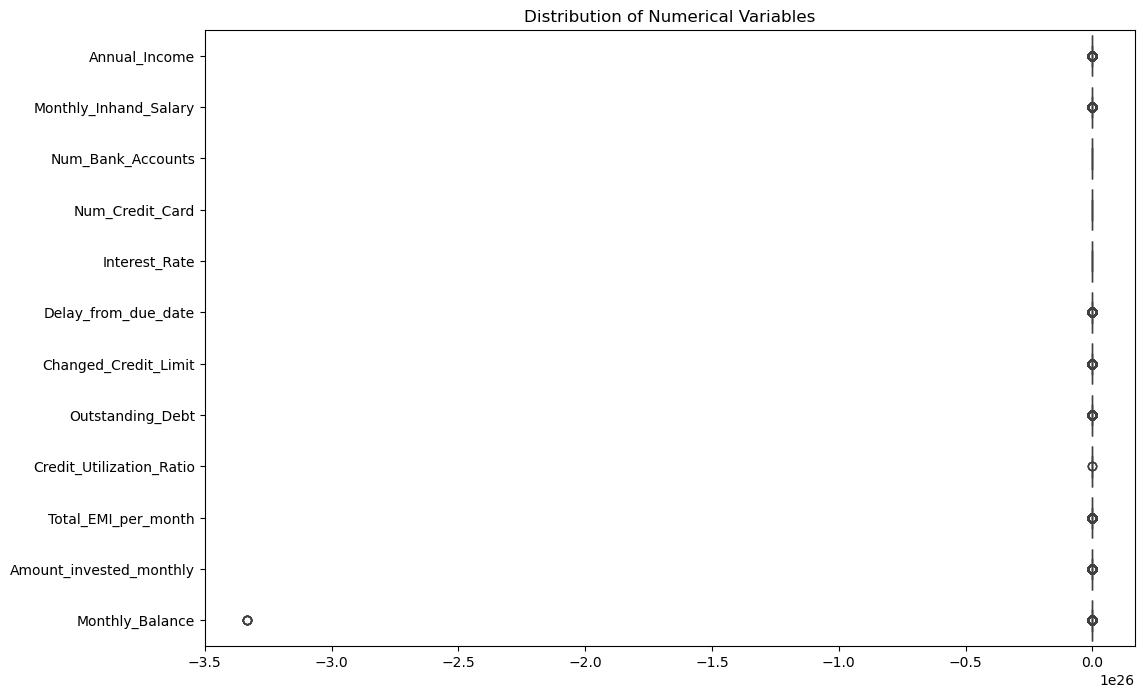

In [558]:
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.boxplot(data=train_df[numerical_vars], orient='h')  # Horizontal boxplot for better visualization

plt.title("Distribution of Numerical Variables")
plt.show()


In [559]:
# Annual Income only

In [560]:
train_df["Annual_Income"].describe()

count     80000.000000
mean      50632.588103
std       39898.570898
min        7005.930000
25%       19303.210000
50%       36964.080000
75%       71676.000000
max      952323.000000
Name: Annual_Income, dtype: float64

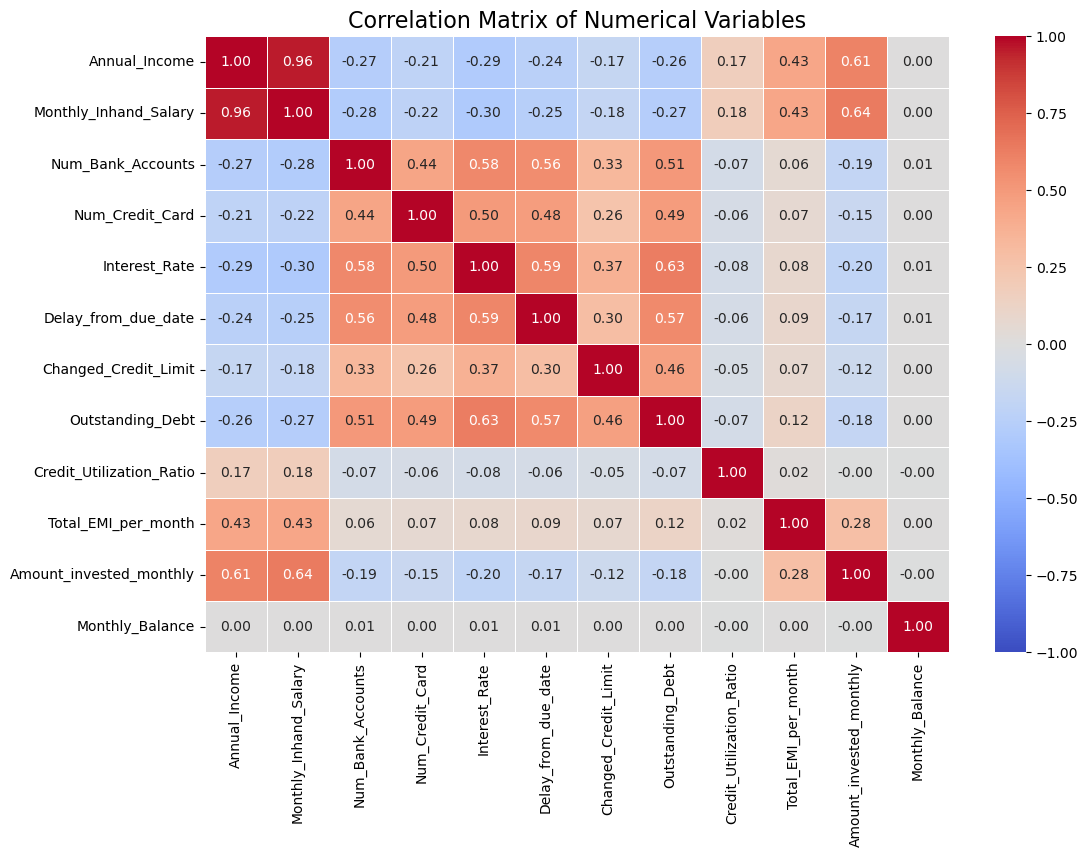

In [561]:
# Correlation matrix 

corr_matrix = train_df[numerical_vars].corr()

plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Add title
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)

# Save the figure
plt.savefig('correlation_matrix.png', bbox_inches='tight')

# Show the plot
plt.show()


In [562]:
# Preprocess for test set

In [563]:
# Delay from due date

In [564]:
column_name = 'Delay_from_due_date'

# Load the saved preprocessing parameters
preprocessing_params = joblib.load('preprocessing_params_delay.pkl')

# Step 1: Set values outside [0, 100] to NaN
test_df[column_name] = test_df[column_name].apply(lambda x: x if (x >= 0 and x <= 100) else np.nan)

# Step 2: Use group mean from train set for imputation
test_group_mean = test_df['Customer_ID'].map(preprocessing_params['group_mean'])

# Step 3: Fill remaining NaNs in group mean with overall mean (or any fallback)
overall_mean = preprocessing_params['group_mean'].mean()
test_group_mean = test_group_mean.fillna(overall_mean)

# Step 4: Round and convert to integer
test_group_mean = test_group_mean.round().astype(int)

# Step 5: Impute test set values
test_df[column_name] = test_df[column_name].fillna(test_group_mean)

# Final check
print(test_df[[column_name, 'Customer_ID']].head(20))
print(f"NaN values after preprocessing in test set: \n{test_df.isna().sum()}")



       Delay_from_due_date Customer_ID
1923                  34.0  CUS_0x7b3c
17639                 47.0  CUS_0x1207
35725                 18.0  CUS_0x6e5d
65889                 55.0  CUS_0x6ccd
77544                 35.0   CUS_0x85d
31428                  9.0   CUS_0xfaf
53491                 26.0  CUS_0xc146
84301                 18.0  CUS_0x2c48
29266                 19.0  CUS_0xa922
71802                 10.0  CUS_0x1746
5198                  38.0  CUS_0x73a6
317                    7.0  CUS_0x571f
95937                  1.0  CUS_0x80ec
96336                 26.0  CUS_0x8f4f
94438                 20.0  CUS_0x8448
87427                 44.0  CUS_0x1efd
33317                 17.0   CUS_0x5a2
73640                  8.0  CUS_0x3b1f
74979                 18.0  CUS_0x6010
21865                 17.0  CUS_0x1621
NaN values after preprocessing in test set: 
Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annu

In [565]:
# Remove underscores

In [566]:
# Function to remove underscores and convert to a number (int/float)
def remove_underscores_and_convert(value):
    # Remove underscores from the value (anywhere) and convert to numeric
    if isinstance(value, str):  # Check if the value is a string
        value = value.replace('_', '')  # Remove all underscores
    return pd.to_numeric(value, errors='coerce')  # Convert to numeric, invalid parsing will become NaN

# Apply remove_underscores_and_convert to all columns except categorical

# List or set of columns you want to exclude
exclude_columns = {'Customer_ID', 'Month', 'Occupation','Type_of_Loan',
                  'Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score'}

# Apply the function to all columns except the ones in exclude_columns
test_df.loc[:, ~test_df.columns.isin(exclude_columns)] = test_df.loc[:, ~test_df.columns.isin(exclude_columns)].map(remove_underscores_and_convert)


In [567]:
# Number of delayed payments

In [568]:
column_name = 'Num_of_Delayed_Payment'

# Load the saved preprocessing parameters
preprocessing_params = joblib.load('preprocessing_params_num_delayed_payment.pkl')

# Step 1: Replace negative values or values greater than 100 with NaN in the test set
test_df[column_name] = test_df[column_name].apply(lambda x: x if (x >= 0 and x <= 100) else np.nan)

# Step 2: Map saved train group means to test set using Customer_ID
test_group_mean = test_df['Customer_ID'].map(preprocessing_params['group_mean_1'])

# Step 3: Fill any NaNs in the mapped group mean with a fallback (e.g. overall mean)
overall_mean = preprocessing_params['group_mean_1'].mean()
test_group_mean = test_group_mean.fillna(overall_mean)

# Step 4: Round and convert to integer safely
test_group_mean = test_group_mean.round().astype(int)

# Step 5: Impute test set NaN values using the prepared group mean
test_df[column_name] = test_df[column_name].fillna(test_group_mean)

# Step 6: Check results
print(test_df[[column_name, 'Customer_ID']].head(20))
print(f"NaN values after preprocessing in test set: \n{test_df.isna().sum()}")


       Num_of_Delayed_Payment Customer_ID
1923                     23.0  CUS_0x7b3c
17639                    12.0  CUS_0x1207
35725                    19.0  CUS_0x6e5d
65889                    22.0  CUS_0x6ccd
77544                    20.0   CUS_0x85d
31428                     2.0   CUS_0xfaf
53491                    15.0  CUS_0xc146
84301                    13.0  CUS_0x2c48
29266                    10.0  CUS_0xa922
71802                    16.0  CUS_0x1746
5198                     12.0  CUS_0x73a6
317                      15.0  CUS_0x571f
95937                     9.0  CUS_0x80ec
96336                    23.0  CUS_0x8f4f
94438                    19.0  CUS_0x8448
87427                    16.0  CUS_0x1efd
33317                    25.0   CUS_0x5a2
73640                    16.0  CUS_0x3b1f
74979                     7.0  CUS_0x6010
21865                    11.0  CUS_0x1621
NaN values after preprocessing in test set: 
Customer_ID                    0
Month                          0
Age    

In [569]:
# Changed credit limit

In [570]:
column_name = 'Changed_Credit_Limit'

# Load saved preprocessing parameters
preprocessing_params = joblib.load('preprocessing_params_changed_credit_limit.pkl')

# Step 1: Remove invalid values
test_df[column_name] = test_df[column_name].apply(lambda x: x if (x >= 0 and x <= 100) else np.nan)

# Step 2: Impute using saved group mean from train set
group_mean = preprocessing_params['group_mean']
test_group_mean = test_df['Customer_ID'].map(group_mean)
test_df[column_name] = test_df[column_name].fillna(test_group_mean)

# Step 3: For any remaining NaNs, impute using Occupation-based mean (from test set itself)
# First, compute occupation-level mean (excluding NaNs)
occupation_mean = test_df.groupby('Occupation')[column_name].transform('mean')

# Now, fill remaining NaNs using this occupation mean
test_df[column_name] = test_df[column_name].fillna(occupation_mean)

# Step 4: Final check
print(test_df[[column_name, 'Customer_ID', 'Occupation']].head(20))
print(f"NaN values after preprocessing in test set: \n{test_df.isna().sum()}")


       Changed_Credit_Limit Customer_ID     Occupation
1923                   6.95  CUS_0x7b3c       Mechanic
17639                  2.69  CUS_0x1207      Developer
35725                 15.82  CUS_0x6e5d   Entrepreneur
65889                 18.52  CUS_0x6ccd       Mechanic
77544                 24.16   CUS_0x85d      Architect
31428                  4.14   CUS_0xfaf      Architect
53491                  7.41  CUS_0xc146        Teacher
84301                  9.91  CUS_0x2c48      Architect
29266                  3.77  CUS_0xa922         Writer
71802                 17.73  CUS_0x1746  Media_Manager
5198                  18.53  CUS_0x73a6      Architect
317                    5.67  CUS_0x571f      Developer
95937                 14.78  CUS_0x80ec   Entrepreneur
96336                 12.81  CUS_0x8f4f     Journalist
94438                  1.02  CUS_0x8448   Entrepreneur
87427                 15.02  CUS_0x1efd        Teacher
33317                 13.69   CUS_0x5a2      Scientist
73640     

In [571]:
# Number of credit inquiries

In [572]:
column_name = 'Num_Credit_Inquiries'

# Load the saved preprocessing parameters
preprocessing_params = joblib.load('preprocessing_params_num_credit_inquiries.pkl')

# Step 1: Replace invalid values with NaN
test_df[column_name] = test_df[column_name].apply(lambda x: x if (x >= 0 and x <= 100) else np.nan)

# Step 2: Impute using group mean from training set
group_mean = preprocessing_params['group_mean']
test_group_mean = test_df['Customer_ID'].map(group_mean)
test_df[column_name] = test_df[column_name].fillna(test_group_mean)

# Step 3: Impute remaining NaNs using mean of others with same Occupation (within test set)
occupation_mean = test_df.groupby('Occupation')[column_name].transform('mean')
test_df[column_name] = test_df[column_name].fillna(occupation_mean)

# Step 4: Final check
print(test_df[[column_name, 'Customer_ID', 'Occupation']].head(20))
print(f"NaN values after preprocessing in test set: \n{test_df.isna().sum()}")



       Num_Credit_Inquiries Customer_ID     Occupation
1923              12.000000  CUS_0x7b3c       Mechanic
17639             15.000000  CUS_0x1207      Developer
35725              9.000000  CUS_0x6e5d   Entrepreneur
65889              7.000000  CUS_0x6ccd       Mechanic
77544             11.000000   CUS_0x85d      Architect
31428              5.556154   CUS_0xfaf      Architect
53491              1.000000  CUS_0xc146        Teacher
84301              0.000000  CUS_0x2c48      Architect
29266              2.000000  CUS_0xa922         Writer
71802              8.000000  CUS_0x1746  Media_Manager
5198              14.000000  CUS_0x73a6      Architect
317                0.000000  CUS_0x571f      Developer
95937              2.000000  CUS_0x80ec   Entrepreneur
96336              8.000000  CUS_0x8f4f     Journalist
94438              4.000000  CUS_0x8448   Entrepreneur
87427              9.000000  CUS_0x1efd        Teacher
33317             11.000000   CUS_0x5a2      Scientist
73640     

In [573]:
# Amount invested monthly

In [574]:
column_name = 'Amount_invested_monthly'

# Load the saved preprocessing parameters
preprocessing_params = joblib.load('preprocessing_params_amount_invested_monthly.pkl')

# Step 1: Replace values < 0 or > 5000 with NaN
test_df[column_name] = test_df[column_name].apply(lambda x: x if (x >= 0 and x <= 5000) else np.nan)

# Step 2: Impute using group mean from training set
group_mean = preprocessing_params['group_mean']
test_group_mean = test_df['Customer_ID'].map(group_mean)
test_df[column_name] = test_df[column_name].fillna(test_group_mean)

# Step 3: Impute remaining NaNs using mean of same Occupation (within test set)
occupation_mean = test_df.groupby('Occupation')[column_name].transform('mean')
test_df[column_name] = test_df[column_name].fillna(occupation_mean)

# Step 4: Final check
print(test_df[[column_name, 'Customer_ID', 'Occupation']].head(20))
print(f"NaN values after preprocessing in test set: \n{test_df.isna().sum()}")

       Amount_invested_monthly Customer_ID     Occupation
1923                 50.620287  CUS_0x7b3c       Mechanic
17639               149.687764  CUS_0x1207      Developer
35725               147.403727  CUS_0x6e5d   Entrepreneur
65889               194.520838  CUS_0x6ccd       Mechanic
77544               109.442464   CUS_0x85d      Architect
31428               199.943181   CUS_0xfaf      Architect
53491               463.520161  CUS_0xc146        Teacher
84301                65.985905  CUS_0x2c48      Architect
29266                77.840442  CUS_0xa922         Writer
71802               170.778577  CUS_0x1746  Media_Manager
5198                195.528635  CUS_0x73a6      Architect
317                  66.777870  CUS_0x571f      Developer
95937               200.598119  CUS_0x80ec   Entrepreneur
96336                33.121813  CUS_0x8f4f     Journalist
94438               111.093101  CUS_0x8448   Entrepreneur
87427               110.344459  CUS_0x1efd        Teacher
33317         

In [575]:
# Monthly balance

In [576]:
column_name = "Monthly_Balance"

# Load the saved preprocessing parameters
preprocessing_params = joblib.load('preprocessing_params_monthly_balance.pkl')

# Step 1: Convert non-numeric values to NaN
test_df[column_name] = pd.to_numeric(test_df[column_name], errors='coerce')

# Step 2: Impute using Customer_ID group mean from training set
group_mean = preprocessing_params['group_mean']
test_group_mean = test_df['Customer_ID'].map(group_mean)
test_df[column_name] = test_df[column_name].fillna(test_group_mean)

# Step 3: Impute remaining NaNs using mean of same Occupation (from test set)
occupation_mean = test_df.groupby('Occupation')[column_name].transform('mean')
test_df[column_name] = test_df[column_name].fillna(occupation_mean)

# Step 4: Check results
print(test_df[[column_name, 'Customer_ID', 'Occupation']].head(20))
print(f"NaN values after preprocessing in test set: \n{test_df.isna().sum()}")

       Monthly_Balance Customer_ID     Occupation
1923        270.918433  CUS_0x7b3c       Mechanic
17639       230.334277  CUS_0x1207      Developer
35725       357.954330  CUS_0x6e5d   Entrepreneur
65889       288.762718  CUS_0x6ccd       Mechanic
77544       342.331760   CUS_0x85d      Architect
31428       378.651733   CUS_0xfaf      Architect
53491       482.411839  CUS_0xc146        Teacher
84301       693.480237  CUS_0x2c48      Architect
29266       372.395014  CUS_0xa922         Writer
71802       285.376435  CUS_0x1746  Media_Manager
5198        236.020427  CUS_0x73a6      Architect
317         663.060436  CUS_0x571f      Developer
95937       855.864645  CUS_0x80ec   Entrepreneur
96336       300.335556  CUS_0x8f4f     Journalist
94438       449.971205  CUS_0x8448   Entrepreneur
87427       260.998156  CUS_0x1efd        Teacher
33317       337.725739   CUS_0x5a2      Scientist
73640       441.886147  CUS_0x3b1f         Doctor
74979       757.008541  CUS_0x6010       Mechanic


In [577]:
column_name = 'Payment_Behaviour'

# Step 1: Replace invalid symbols with NaN
invalid_value = '!@9#%8'
test_df[column_name] = test_df[column_name].replace(invalid_value, np.nan)

# Step 2: Load the saved group_mode from train set
preprocessing_params = joblib.load('preprocessing_params_payment_behaviour.pkl')
group_mode = preprocessing_params['group_mode']

# Map group_mode to test_df using Customer_ID
test_group_mode = test_df['Customer_ID'].map(group_mode)

# Step 3: Impute missing values using group mode
test_df[column_name] = test_df[column_name].fillna(test_group_mode)

# Step 4: For remaining NaNs, impute using mode of same Occupation
# Define a function to compute mode for a Series
def get_mode(series):
    mode = series.mode()
    return mode[0] if not mode.empty else np.nan

# Compute mode per Occupation
occupation_mode = test_df.groupby('Occupation')[column_name].transform(get_mode)

# Impute remaining missing values
test_df[column_name] = test_df[column_name].fillna(occupation_mode)

# Step 5: Final check
print(test_df[[column_name, 'Customer_ID', 'Occupation']].head(20))
print(f"Remaining NaNs after imputation: \n{test_df[column_name].isna().sum()}")



                      Payment_Behaviour Customer_ID     Occupation
1923   High_spent_Medium_value_payments  CUS_0x7b3c       Mechanic
17639    Low_spent_Small_value_payments  CUS_0x1207      Developer
35725   Low_spent_Medium_value_payments  CUS_0x6e5d   Entrepreneur
65889    Low_spent_Small_value_payments  CUS_0x6ccd       Mechanic
77544  High_spent_Medium_value_payments   CUS_0x85d      Architect
31428    Low_spent_Large_value_payments   CUS_0xfaf      Architect
53491    Low_spent_Large_value_payments  CUS_0xc146        Teacher
84301   High_spent_Large_value_payments  CUS_0x2c48      Architect
29266  High_spent_Medium_value_payments  CUS_0xa922         Writer
71802   High_spent_Small_value_payments  CUS_0x1746  Media_Manager
5198     Low_spent_Small_value_payments  CUS_0x73a6      Architect
317    High_spent_Medium_value_payments  CUS_0x571f      Developer
95937   High_spent_Large_value_payments  CUS_0x80ec   Entrepreneur
96336   High_spent_Small_value_payments  CUS_0x8f4f     Journa

In [578]:
# Data type conversion

In [579]:
# Convert numerical variables data type from object to float64 accordingly

# List of columns to convert to float
columns_to_convert = ['Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

for column in columns_to_convert:
    test_df[column] = pd.to_numeric(test_df[column], errors='coerce')


In [580]:
# List of columns to convert to integer
columns_to_convert = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment']

for column in columns_to_convert:
    test_df[column] = pd.to_numeric(test_df[column], errors='coerce').fillna(0).astype(int)

# Check the result
print(test_df[columns_to_convert].head())

       Age  Num_of_Loan  Num_of_Delayed_Payment
1923    40            9                      23
17639   33            6                      12
35725   39            5                      19
65889   29            8                      22
77544   45            7                      20


In [581]:
# Check for missing values

# Check for missing values in the dataset
missing_values = test_df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

# Check for duplicates in the dataset
duplicates = test_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

Missing Values:
Type_of_Loan    2251
dtype: int64

Number of duplicate rows: 0


In [582]:
# Write to csv file

In [583]:
test_df.to_csv('test_data_stratify.csv', index=False)    # Save test_df to 'test_data.csv'

In [584]:
# Separate target

test_target = test_df["Credit_Score"]

In [585]:
# Drop target 

test_df.drop(columns=['Credit_Score'], inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1923 to 2242
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               20000 non-null  object 
 1   Month                     20000 non-null  object 
 2   Age                       20000 non-null  int32  
 3   Occupation                20000 non-null  object 
 4   Annual_Income             20000 non-null  float64
 5   Monthly_Inhand_Salary     20000 non-null  float64
 6   Num_Bank_Accounts         20000 non-null  float64
 7   Num_Credit_Card           20000 non-null  int64  
 8   Interest_Rate             20000 non-null  int64  
 9   Num_of_Loan               20000 non-null  int32  
 10  Type_of_Loan              17749 non-null  object 
 11  Delay_from_due_date       20000 non-null  float64
 12  Num_of_Delayed_Payment    20000 non-null  int32  
 13  Changed_Credit_Limit      20000 non-null  float64
 14  Num_Credi